In [2]:
%load_ext zipline

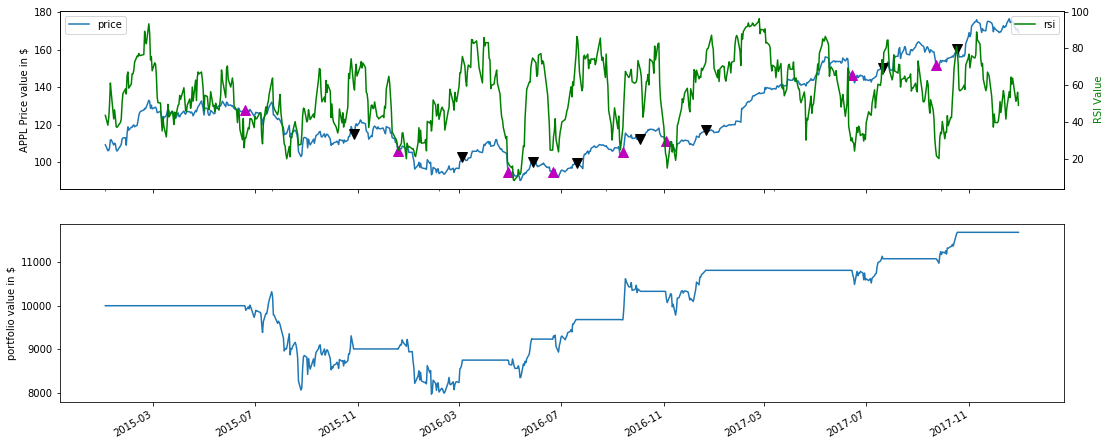

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,-0.000535,NaN,NaN,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,1,[],0.0
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,-0.018585,0.196720,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,2,[],0.0
2015-01-06 21:00:00+00:00,0.000000,0.000000,0.000000,-0.027829,0.139106,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,3,[],0.0
2015-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,-0.015715,0.206973,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,4,[],0.0
2015-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,0.001752,0.236042,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,5,[],0.0
2015-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,-0.006276,0.218112,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,6,[],0.0
2015-01-12 21:00:00+00:00,0.000000,0.000000,0.000000,-0.014060,0.203322,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,7,[],0.0
2015-01-13 21:00:00+00:00,0.000000,0.000000,0.000000,-0.016834,0.188302,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,8,[],0.0
2015-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,-0.022769,0.177394,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,9,[],0.0
2015-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,-0.031722,0.170558,0.000000,0.0,10000.0000,0.0,0.0,...,0.0,0.0,0,NaN,10000.0000,0.0,0.0,10,[],0.0


In [5]:
%%zipline --start 2015-1-1 --end 2018-1-1 --capital-base 10000 -o ../data/strategy7.pickle

import matplotlib.pyplot as plt
import talib
from talib import BBANDS
from zipline.api import (
    sid, 
    symbol,
    schedule_function, 
    date_rules, 
    time_rules,
    order_target_percent,
    record)

def initialize(context):
    # SPY
    context.asset = symbol('AAPL')
    context.HIGH_RSI = 70
    context.LOW_RSI = 30
    
    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())


# Rebalance daily.
def rebalance(context, data):
    current_position = context.portfolio.positions[context.asset].amount
    # Load historical data for the stocks
    days = 16
    prices = data.history(context.asset, 
                          fields='price', 
                          bar_count=days, 
                          frequency='1d')
    price = prices[-1]
    stock = context.asset  
    #print(prices)
    rsi = talib.RSI(prices, timeperiod=days-2)[-1]
    #print(rsi)
    # RSI is above 70 and we own shares, time to sell
    if rsi > context.HIGH_RSI and current_position > 0 and data.can_trade(stock):
        order_target_percent(stock, 0)
   
    # RSI is below 30 and we don't have any shares, time to buy
    if rsi < context.LOW_RSI and current_position == 0 and data.can_trade(stock):
        order_target_percent(stock, 1)

    # record the current RSI values of each stock
    record(price=price,
           rsi=rsi)
   

def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf[['price']].plot(ax=ax1)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[
        [t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax1.plot(buys.index, perf['price'].ix[buys.index],
             '^', markersize=10, color='m')
    ax1.plot(sells.index, perf['price'].ix[sells.index],
             'v', markersize=10, color='k')
    ax12 = ax1.twinx()
    perf[['rsi']].plot(ax=ax12, color='g')  
    ax1.set_ylabel('APPL Price value in $') 
    ax12.set_ylabel('RSI Value', color='g')
        
    ax2 = fig.add_subplot(212)
    perf.portfolio_value.plot(ax=ax2)
    ax2.set_ylabel('portfolio value in $')
    plt.gcf().set_size_inches(18, 8)
    plt.show()
    

In [6]:
import pandas as pd
perf = pd.read_pickle('../data/strategy7.pickle')
#perf.columns
print("Benchmark Profit:{:>16.5f} \nOur strategy Profit: {:>12.5f}".format(perf['benchmark_period_return'][-1], perf['algorithm_period_return'][-1]))

perf[['benchmark_period_return','algorithm_period_return']]


Benchmark Profit:         0.37983 
Our strategy Profit:      0.16853


,benchmark_period_return,algorithm_period_return
2015-01-02 21:00:00+00:00,-0.000535,0.000000
2015-01-05 21:00:00+00:00,-0.018585,0.000000
2015-01-06 21:00:00+00:00,-0.027829,0.000000
2015-01-07 21:00:00+00:00,-0.015715,0.000000
2015-01-08 21:00:00+00:00,0.001752,0.000000
2015-01-09 21:00:00+00:00,-0.006276,0.000000
2015-01-12 21:00:00+00:00,-0.014060,0.000000
2015-01-13 21:00:00+00:00,-0.016834,0.000000
2015-01-14 21:00:00+00:00,-0.022769,0.000000
2015-01-15 21:00:00+00:00,-0.031722,0.000000
